
# 5-MODUL. Machine Learning.

### Amaliyot. Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/reklama_sales.csv')
df.head(20)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


Yuqoridagi jadvalda MohirDev MChJ tomonidan turli OAV larda (`TV`, `Radio`, `Newspaper`) berilgan reklamalar soni va mos keluvchi savdolar (`Sales`) berilgan.

Sizning vazifangiz:
1. Aynan qaysi turdagi OAVda reklama berish savdo o'sishiga ta'sir qiladi aniqlash
2. Topilgan bog'liqlik asosida Simple Linear Regression algorithmi yordamida bashorat modelini qurish.


Ushbu amaliyotda sizning vazifangiz berilgan dataset yordamida Simple Linear Regression model yaratish:
- CRISP-DM metodologiyasiga amal qiling!
- Simple linear regression qo'llash uchun 1 ta ustunni tanlab oling.

Ushbu amaliyotda sizning vazifangiz berilgan dataset yordamida Simple Linear Regression model yaratish:
- CRISP-DM metodologiyasiga amal qiling!
- Simple linear regression qo'llash uchun 1 ta ustunni tanlab oling.

In [3]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


#  Korrelyatsiya matritsasi

In [5]:
corr = df.corr()
corr

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


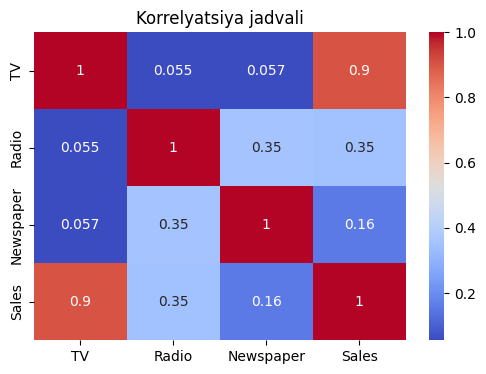

In [6]:
plt.figure(figsize=(6,4))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Korrelyatsiya jadvali')
plt.show()

# Endi TV ustuni asosida Simple Linear Regression modelini quramiz.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Mustaqil (X) va bog‘liq (y) o‘zgaruvchilar
X = df[['TV']]
y = df['Sales']

# Train/Test bo‘lish
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model yaratish va o‘qitish
model = LinearRegression()
model.fit(X_train, y_train)

# Ko‘rsatkichlar
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)


Intercept: 7.007108428241848
Coefficient: [0.05548294]


Model natijasi
r2 = 0.802561303423698
mse = 6.101072906773963
0.14947497779919783


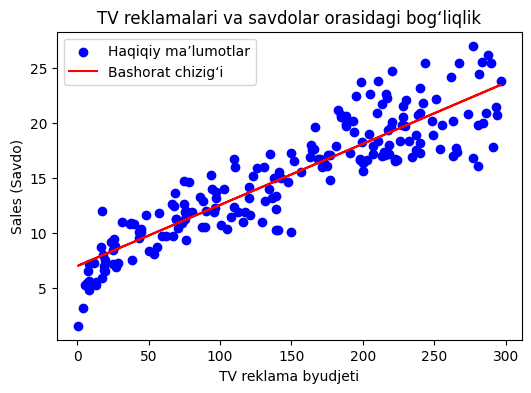

In [9]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,r2_score

# Baholash
y_pred = model.predict(X_test)

# Baholash

r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_percentage_error(y_test,y_pred)


print("Model natijasi")
print(f"{r2 = }")
print(f"{mse = }")
print(f"{mae}")


# Grafik chizish
plt.figure(figsize=(6,4))
plt.scatter(X, y, color='blue', label='Haqiqiy ma’lumotlar')
plt.plot(X, model.predict(X), color='red', label='Bashorat chizig‘i')
plt.xlabel('TV reklama byudjeti')
plt.ylabel('Sales (Savdo)')
plt.title('TV reklamalari va savdolar orasidagi bog‘liqlik')
plt.legend()
plt.show()